In [ ]:
import pandas as pd
import numpy as np

urineDS=pd.read_csv("/content/drive/MyDrive/Grad2/lastUrine.csv")
urineDS=urineDS.iloc[:,1:]

from sklearn.preprocessing import StandardScaler


urineOutput=urineDS.iloc[2:,1:2]
urineInput=urineDS.iloc[2:,4:]

data = urineInput
scaler = StandardScaler()
scaler.fit(data)
urineInput=scaler.transform(data)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(urineInput, urineOutput, test_size=0.33, random_state=0)

In [ ]:
X_train=X_train.astype(np.float64)
X_test=X_test.astype(np.float64)
y_train=y_train.astype(np.float64)
y_test=y_test.astype(np.float64)

X_train=X_train.astype(np.int64)
y_train=y_train.astype(np.int64)
X_train=X_train.astype(np.float64)
y_train=y_train.astype(np.float64)
print(y_train)

     Unnamed: 1
231        46.0
20         52.0
169        25.0
254        50.0
126        73.0
..          ...
253        30.0
194        60.0
119        61.0
49         61.0
174        62.0

[201 rows x 1 columns]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten,concatenate

from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
import keras
from matplotlib import pyplot as plt

model = Sequential()
model.add(Conv1D(256, 3, activation='relu', input_shape=(8, 1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dropout(0.25))
model.add(Conv1D(64, 1, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dropout(0.5))
model.add(Flatten())
x1=model.output

model2 = Sequential()
model2.add(Conv1D(256, 3, activation='relu', input_shape=(324, 1)))
model2.add(Conv1D(256, 3, activation='relu'))
model2.add(Dropout(0.25))
model2.add(MaxPooling1D(2))
model2.add(Conv1D(128, 3, activation='relu'))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.25))
model2.add(Conv1D(64, 3, activation='relu'))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.5))
model2.add(Flatten())
x2=model2.output


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import keras
from keras.models import Sequential, Model
from keras.layers import GlobalAveragePooling2D, Dense, Input, Dropout, concatenate
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split

from math import ceil
import datetime

In [ ]:
x = concatenate([ x2,x1])
#x = Sequential()(x)
x = Dense(16, activation='relu')(x) 
x = Dropout(0.2)(x)
predictions = Dense(1, activation='relu')(x)


model4 = Model(inputs=[ model2.input,model.input], outputs=predictions) # Inputs go into 3 different layers
model4.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

In [ ]:
history =model4.fit((X_train[:,197:521],X_train[:,521:529]),y_train, batch_size=32, epochs=150, validation_split=0.1)

Epoch 1/150
6/6 [==============================] - 4s 409ms/step - loss: 40.3706 - mean_absolute_error: 40.3706 - val_loss: 23.5981 - val_mean_absolute_error: 23.5981
Epoch 2/150
6/6 [==============================] - 2s 353ms/step - loss: 20.8974 - mean_absolute_error: 20.8974 - val_loss: 18.4220 - val_mean_absolute_error: 18.4220
Epoch 3/150
6/6 [==============================] - 2s 360ms/step - loss: 20.1620 - mean_absolute_error: 20.1620 - val_loss: 22.2961 - val_mean_absolute_error: 22.2961
Epoch 4/150
6/6 [==============================] - 2s 355ms/step - loss: 19.5011 - mean_absolute_error: 19.5011 - val_loss: 19.7995 - val_mean_absolute_error: 19.7995
Epoch 5/150
6/6 [==============================] - 2s 356ms/step - loss: 17.0527 - mean_absolute_error: 17.0527 - val_loss: 18.2176 - val_mean_absolute_error: 18.2176
Epoch 6/150
6/6 [==============================] - 2s 358ms/step - loss: 18.1699 - mean_absolute_error: 18.1699 - val_loss: 19.3967 - val_mean_absolute_error: 19.396

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


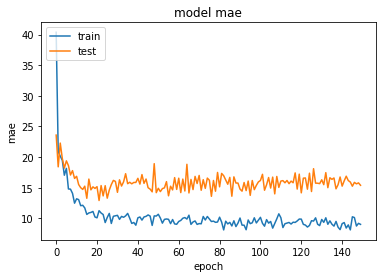

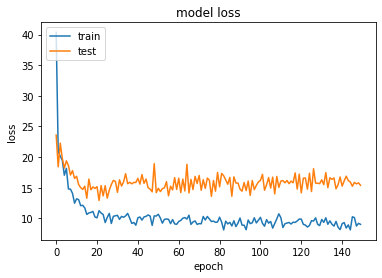

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)
model4.save('/content/drive/MyDrive/Grad2Models/yasGCClinic')

2.8.2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Grad2Models/yasGCClinic/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Grad2Models/yasGCClinic', compile=False)

# Check its architecture
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv1d_4_input (InputLayer)    [(None, 324, 1)]     0           []                               
                                                                                                  
 conv1d_input (InputLayer)      [(None, 8, 1)]       0           []                               
                                                                                                  
 conv1d_4 (Conv1D)              (None, 322, 256)     1024        ['conv1d_4_input[0][0]']         
                                                                                                  
 conv1d (Conv1D)                (None, 6, 256)       1024        ['conv1d_input[0][0]']           
                                                                                            

In [ ]:
prediction=new_model.predict((X_test[:,197:521],X_test[:,521:529]))


    

yout=y_test.to_numpy()    
counter=0
counter2=0
counter3=0
yout = yout. astype(int)
total=0
for i in range (prediction.shape[0]):
  if prediction[i]%1>=0.5:
    prediction[i]=int(prediction[i])+1
  else :
     prediction[i]=int(prediction[i])  

for i in range (prediction.shape[0]):
  if prediction[i]>yout[i]:
    total=total+prediction[i]-yout[i]
  else:
    total=total+yout[i]-prediction[i]

print("Hata Payı = %",total/100)   

Hata Payı = % [13.95]
